In [ ]:
# to run in google colab
import sys

if "google.colab" in sys.modules:
    import subprocess

    subprocess.call("apt-get install subversion".split())
    subprocess.call("svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_07_camera_calibration/images".split())




In [ ]:
import numpy as np
import cv2
from glob import glob
import matplotlib.pyplot as plt



In [ ]:
square_size = 2.88
img_mask = "./images/*.jpeg"
pattern_size = (9, 6)

figsize = (20, 20)


In [ ]:

img_names = glob(img_mask)
num_images = len(img_names)

pattern_points = np.zeros((np.prod(pattern_size), 3), np.float32)
pattern_points[:, :2] = np.indices(pattern_size).T.reshape(-1, 2)
pattern_points *= square_size

obj_points = []
img_points = []
h, w = cv2.imread(img_names[0]).shape[:2]



## Step 1: find all corners in calibration plane


processing ./images\1.jpeg... 
./images\1.jpeg... OK
processing ./images\10.jpeg... 
./images\10.jpeg... OK
processing ./images\11.jpeg... 
./images\11.jpeg... OK
processing ./images\12.jpeg... 
./images\12.jpeg... OK
processing ./images\13.jpeg... 
./images\13.jpeg... OK
processing ./images\14.jpeg... 
./images\14.jpeg... OK
processing ./images\15.jpeg... 
./images\15.jpeg... OK
processing ./images\16.jpeg... 
./images\16.jpeg... OK
processing ./images\17.jpeg... 
./images\17.jpeg... OK
processing ./images\2.jpeg... 
./images\2.jpeg... OK
processing ./images\3.jpeg... 
./images\3.jpeg... OK
processing ./images\4.jpeg... 
./images\4.jpeg... OK
processing ./images\5.jpeg... 
./images\5.jpeg... OK
processing ./images\6.jpeg... 
./images\6.jpeg... OK
processing ./images\7.jpeg... 
./images\7.jpeg... OK
processing ./images\8.jpeg... 
./images\8.jpeg... OK
processing ./images\9.jpeg... 
./images\9.jpeg... OK


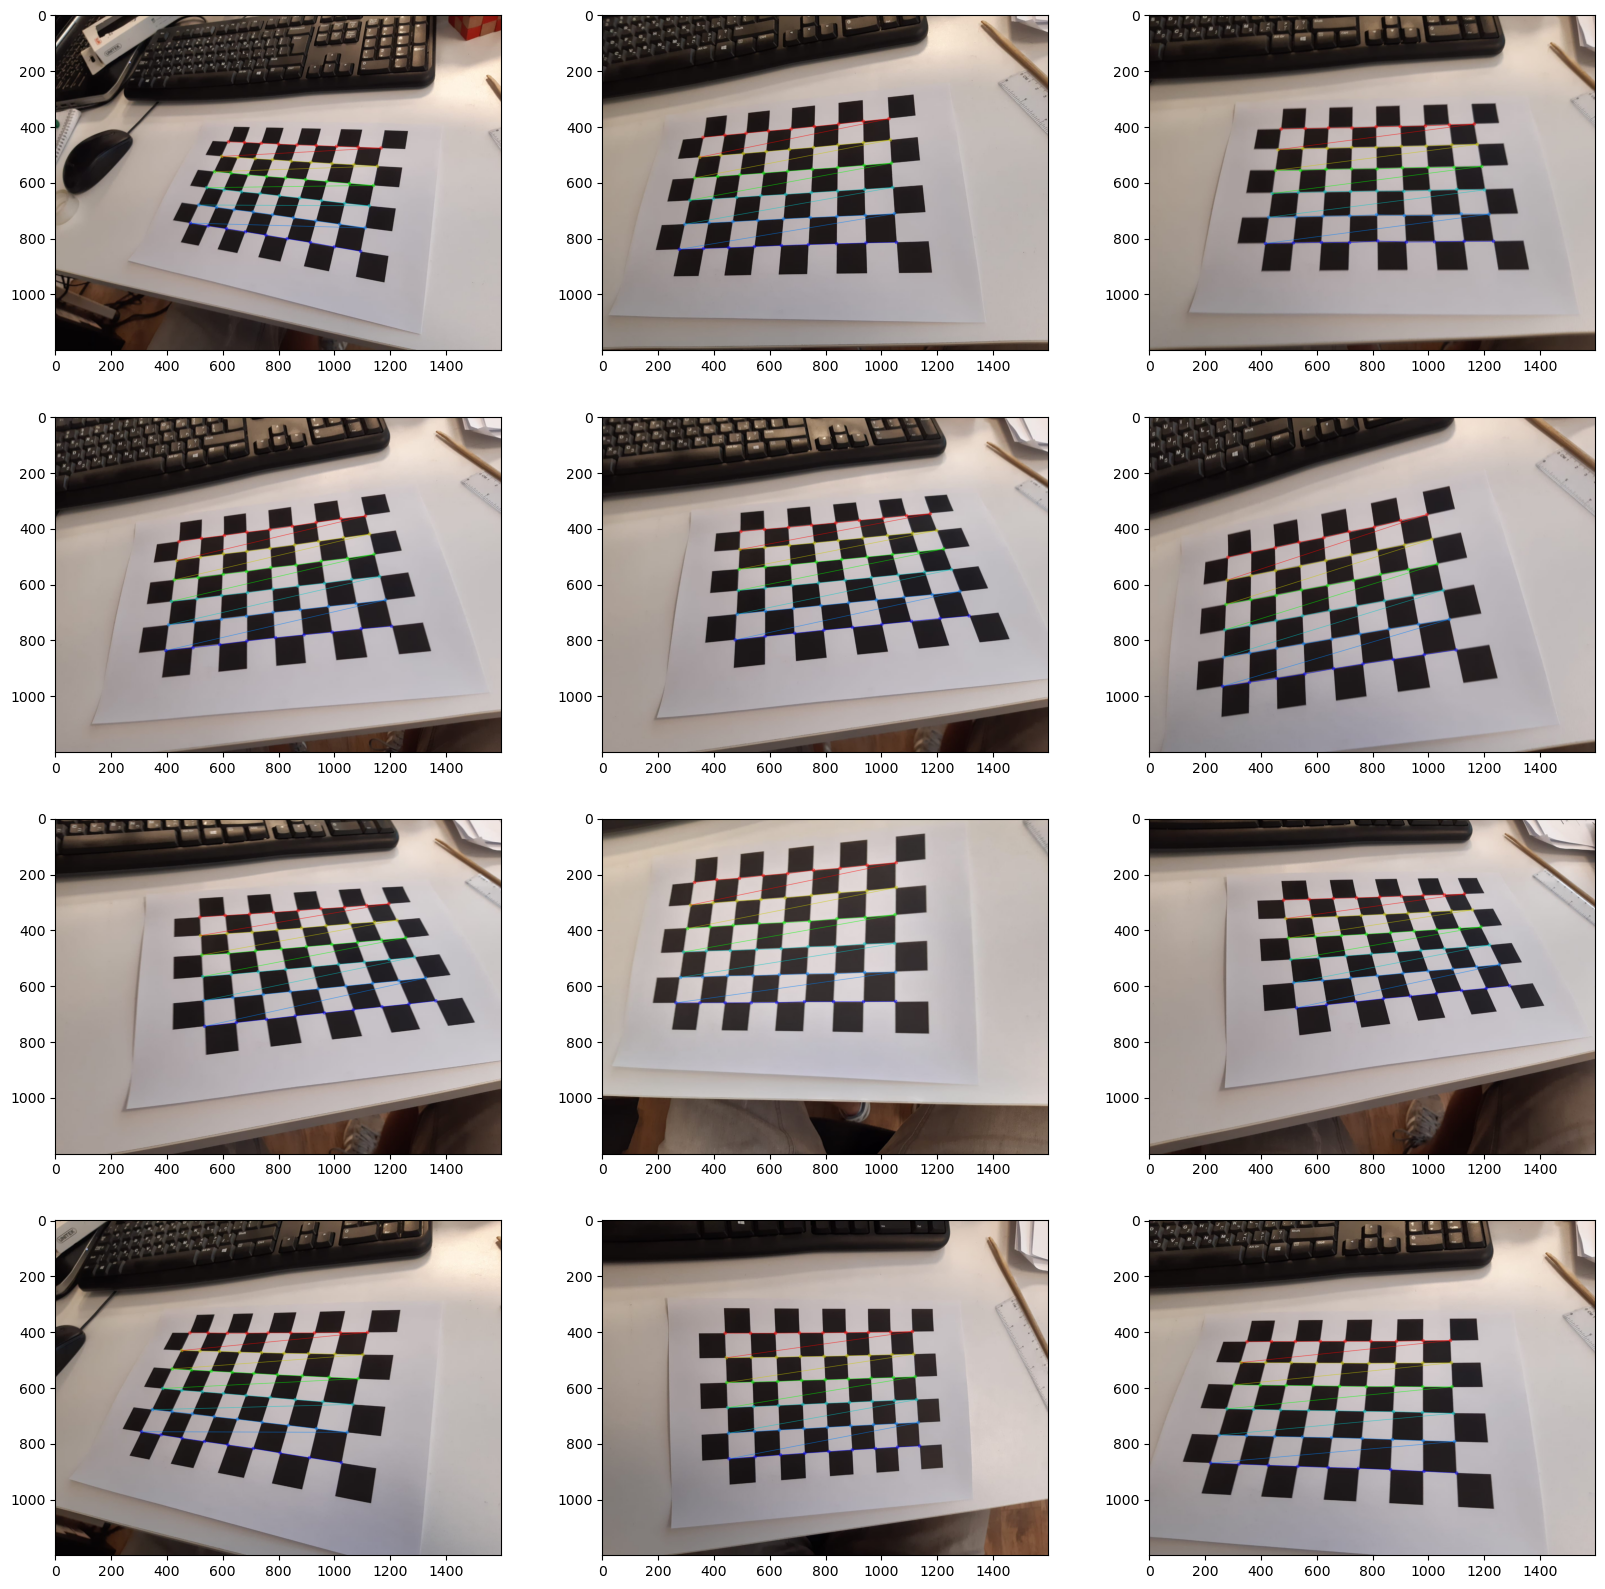

In [ ]:
plt.figure(figsize=figsize)

for i, fn in enumerate(img_names):
    print("processing %s... " % fn)
    imgBGR = cv2.imread(fn)

    if imgBGR is None:
        print("Failed to load", fn)
        continue

    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)

    assert w == img.shape[1] and h == img.shape[0], f"size: {img.shape[1]} x {img.shape[0]}"
    found, corners = cv2.findChessboardCorners(img, pattern_size)
    # # if you want to better improve the accuracy... cv2.findChessboardCorners already uses cv2.cornerSubPix
    # if found:
    #     term = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 0.1)
    #     cv2.cornerSubPix(img, corners, (5, 5), (-1, -1), term)

    if not found:
        print("chessboard not found")
        continue

    if i < 12:
        img_w_corners = cv2.drawChessboardCorners(imgRGB, pattern_size, corners, found)
        plt.subplot(4, 3, i + 1)
        plt.imshow(img_w_corners)

    print(f"{fn}... OK")
    img_points.append(corners.reshape(-1, 2))
    obj_points.append(pattern_points)


plt.show()



In [ ]:
# calculate camera distortion
rms, camera_matrix, dist_coefs, _rvecs, _tvecs = cv2.calibrateCamera(obj_points, img_points, (w, h), None, None)

print("\nRMS:", rms)
print("camera matrix:\n", camera_matrix)
print("distortion coefficients: ", dist_coefs.ravel())




RMS: 0.9717982774285921
camera matrix:
 [[1.23559063e+03 0.00000000e+00 7.90654119e+02]
 [0.00000000e+00 1.23783760e+03 6.16444448e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
distortion coefficients:  [ 2.16337296e-01 -8.82451301e-01  1.04170317e-04  1.39993252e-03
  1.09531234e+00]


## Build undistorted images


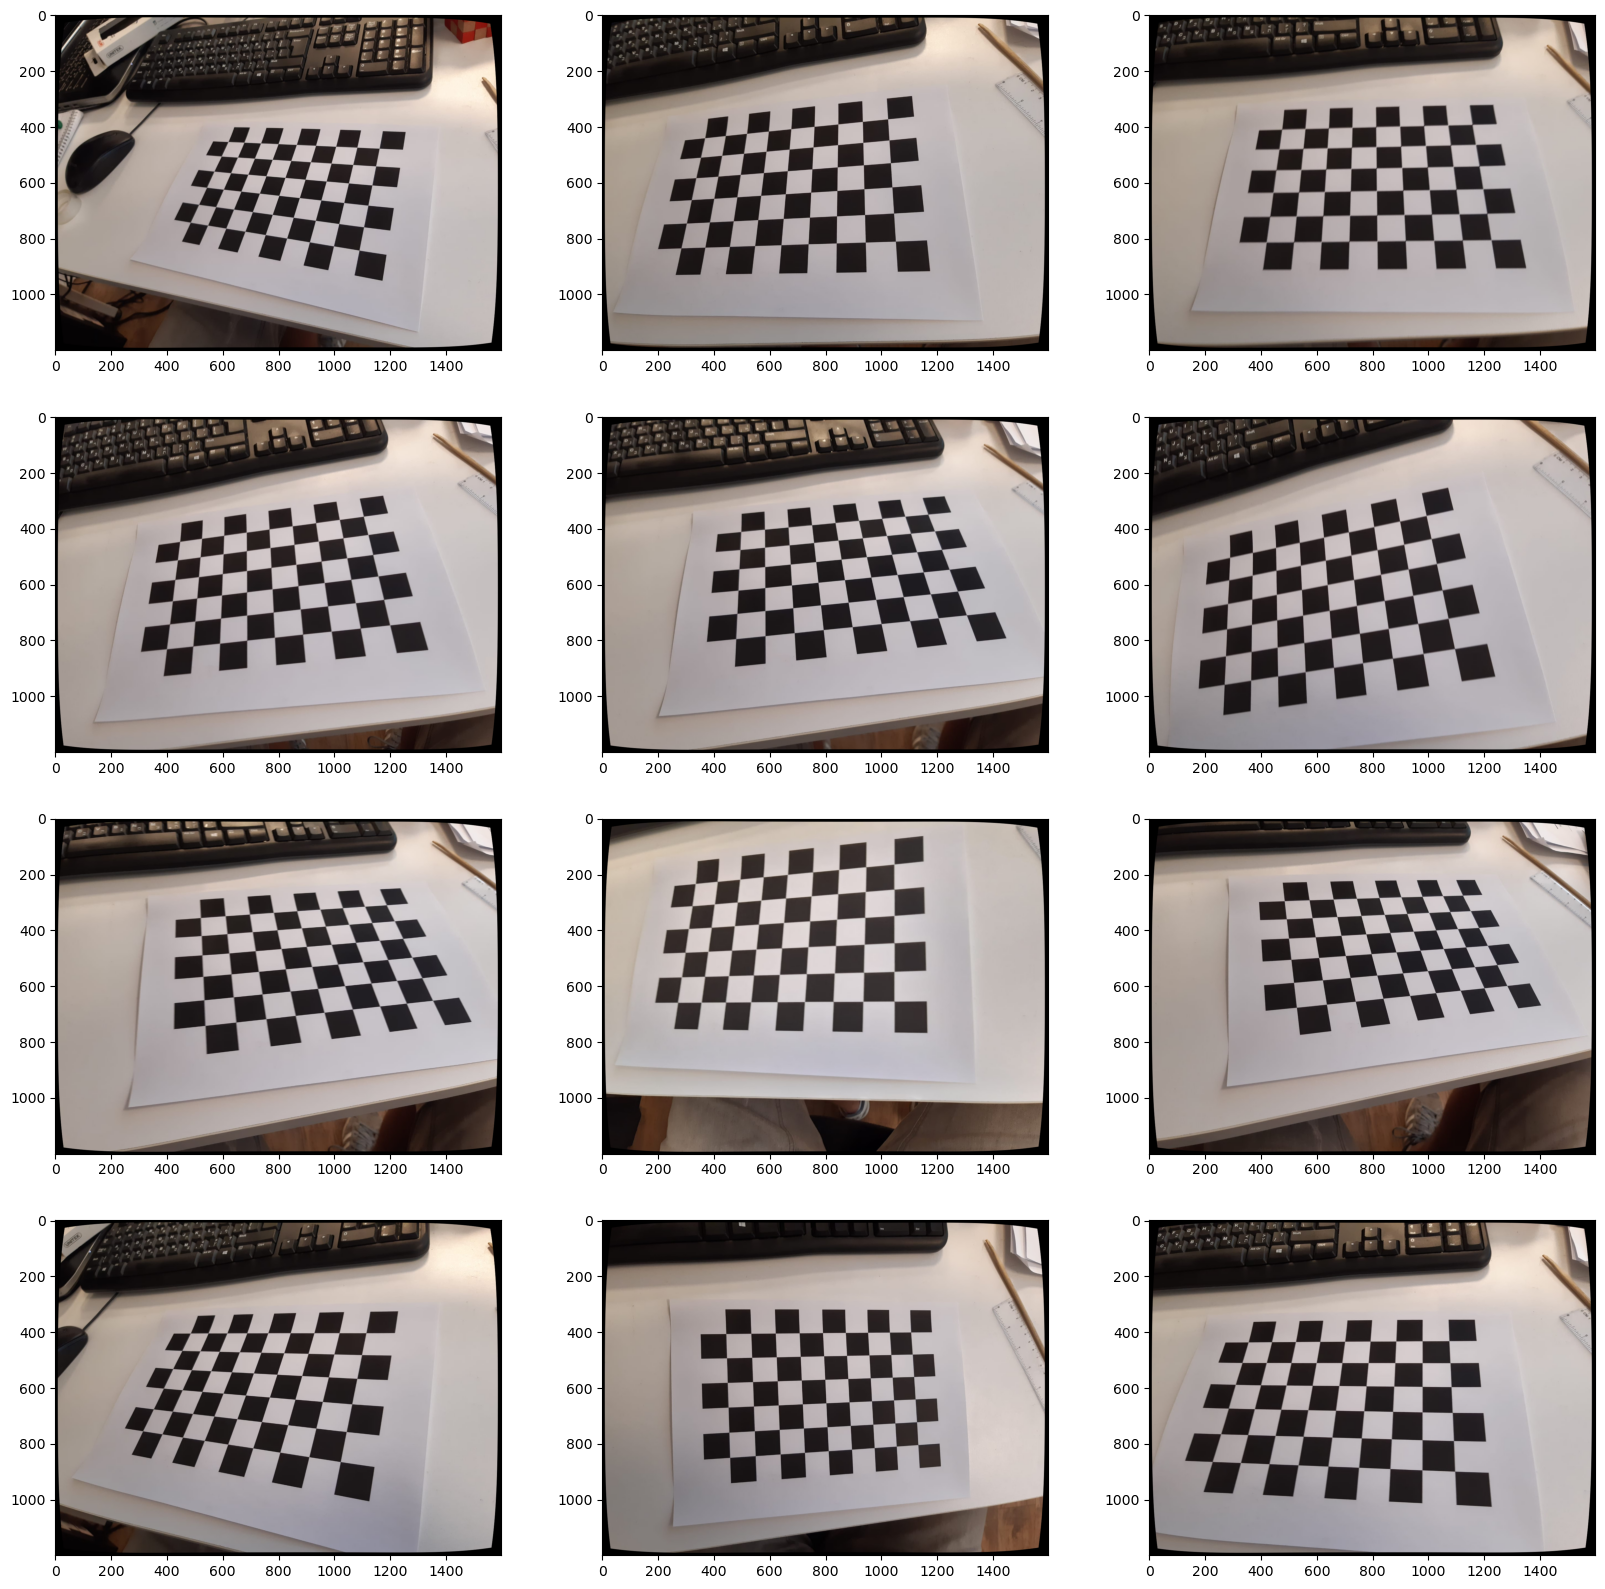

Done


In [ ]:
# undistort the image with the calibration
plt.figure(figsize=figsize)
for i, fn in enumerate(img_names):

    imgBGR = cv2.imread(fn)
    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

    dst = cv2.undistort(imgRGB, camera_matrix, dist_coefs)

    if i < 12:
        plt.subplot(4, 3, i + 1)
        plt.imshow(dst)

plt.show()
print("Done")

